# Airline Tweets Sentiment Analysis

## 1) Exploratory Data Analysis & Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

##### Importing Data

In [3]:
df_data=pd.read_csv('Tweets.csv')
test_data=pd.read_csv('0000000000002747_test_twitter_x_test.csv')
df_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [68]:
df_data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

##### Removing Null Values & Useless Columns

In [4]:
df_data.drop('tweet_id', inplace = True, axis = 1)
df_data.drop('airline_sentiment_gold', inplace = True, axis = 1)
df_data.drop('negativereason_gold', inplace = True, axis = 1)
df_data.drop('tweet_coord', inplace = True, axis = 1)

In [5]:
df_data.isnull().sum()

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

In [6]:
print("Total number of tweets for each airline \n ",df_data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))


Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


## 2) Visual Data Analysis

### Percentage of negative Tweets

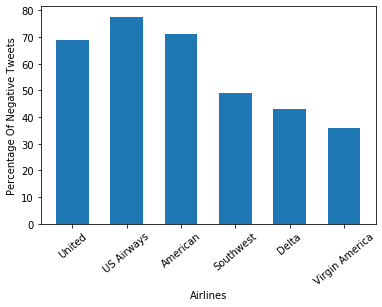

In [12]:
neg_tweets=df_data[df_data['airline_sentiment'] == 'negative']
neg_dict=neg_tweets['airline'].value_counts()
total_dict=df_data['airline'].value_counts()
num=np.array(neg_dict.values)
den=np.array(total_dict.values)
per=(num/den)*100
plt.bar(neg_dict.index,per,width=0.6)
plt.xticks(rotation=40)
plt.xlabel("Airlines")
plt.ylabel("Percentage Of Negative Tweets")
plt.show()

### Percentage of Positive Tweets

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

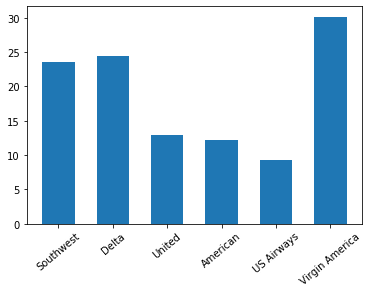

In [40]:
pos_tweets=df_data[df_data['airline_sentiment'] == 'positive']
pos_dict=pos_tweets['airline'].value_counts()
total_dict=df_data['airline'].value_counts()
per_pos=[]
for i in pos_dict.index:
    num=pos_dict[i]
    den=total_dict[i]
    per_pos.append((num/den)*100)
plt.bar(pos_dict.index,per_pos,width=0.6)
plt.xticks(rotation=40)

### Tweeet Distribution per Airline

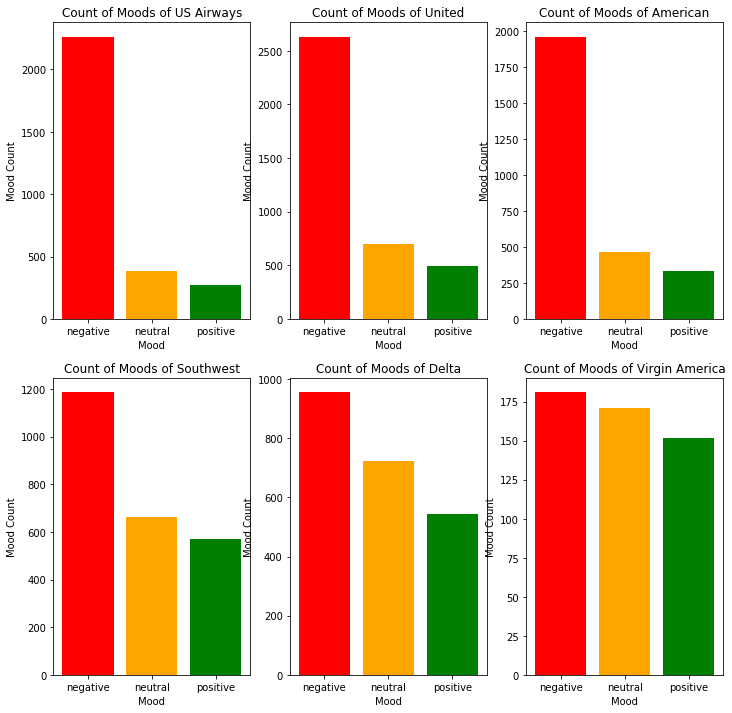

In [48]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df_data[df_data['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'orange', 'green'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

### Negative Reasons

Text(0.5, 1.0, 'Reasons for Negative Tweets across Airlines')

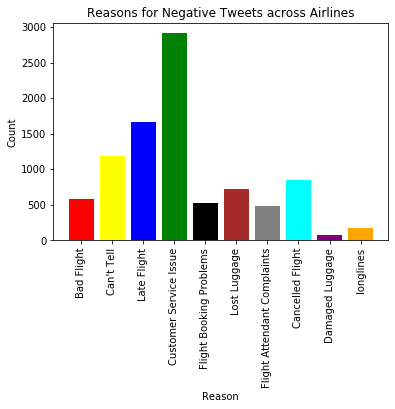

In [39]:
neg_reason=df_data['negativereason'].value_counts()
Unique_reason=list(df_data['negativereason'].unique())
Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
#print(Unique_reason)
res = [neg_reason[x] for x in Unique_reason]
#print(res)

    
plt.bar(Unique_reason,res,color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Reason')
plt.title("Reasons for Negative Tweets across Airlines")

### WordCloud for Positive Tweets

In [59]:
from wordcloud import WordCloud,STOPWORDS

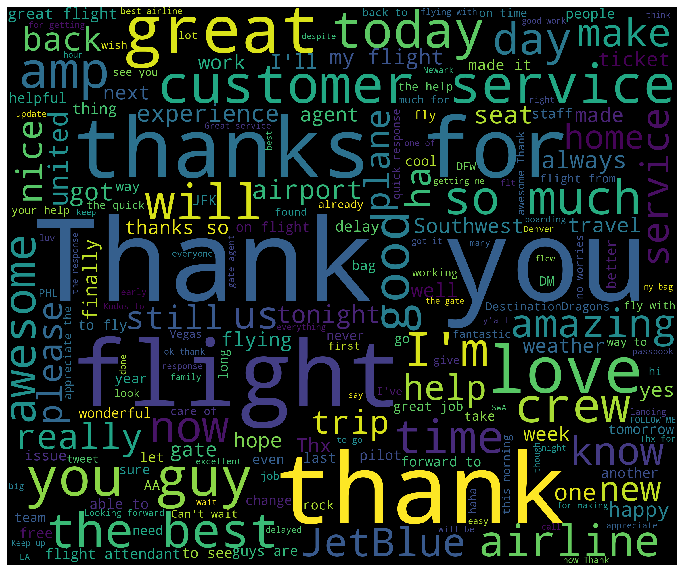

In [68]:
new_df=df_data[df_data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                         if 'http' not in word and not word.startswith('@') and word != 'RT' ])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=3000, height=2500).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Worldcloud for Negative Tweets

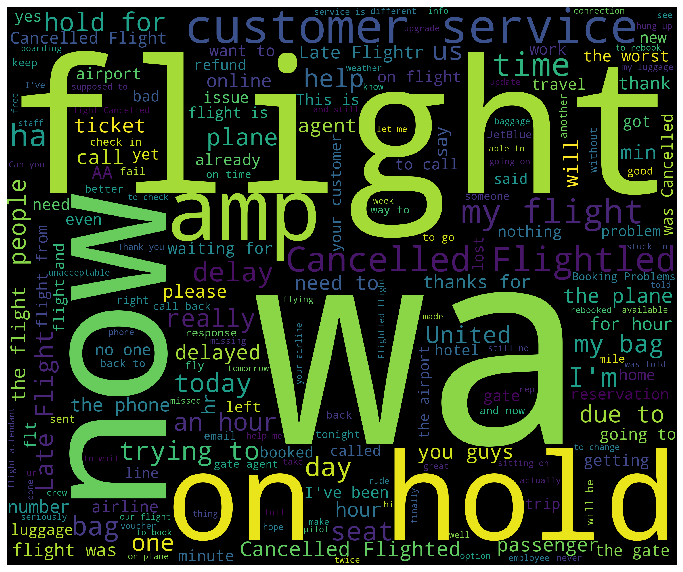

In [67]:
new_df=df_data[df_data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT' and word !='wa'])
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3) Sentiment Analysis

In [15]:
#Converts Categorical Classes into numbers that can be understood by ML models
#Converted Positive Negative to 0,1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_data['airline_sentiment'] = le.fit_transform(train_data['airline_sentiment'])
df_data.head(2)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,1,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,2,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [20]:
#Train Test Split
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
train_data,test_data = train_test_split(df_data,test_size=0.2,random_state=42)

##### Data Cleaning

In [21]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [22]:
train_data['clean_tweet'] = train_data['text'].apply(lambda x: tweet_to_words(x))

test_data['clean_tweet'] = test_data['text'].apply(lambda x: tweet_to_words(x))

C:\Users\91852\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\91852\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
train_clean_tweet=[]
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
    
test_clean_tweet=[]
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

##### Predicting Sentiments

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word",min_df =10)
train_features= v.fit_transform(train_clean_tweet)
test_features= v.transform(test_clean_tweet)

In [25]:
train_features

<11712x1456 sparse matrix of type '<class 'numpy.int64'>'
	with 93320 stored elements in Compressed Sparse Row format>

In [26]:
v.get_feature_names()

['aa',
 'able',
 'absolute',
 'absolutely',
 'absurd',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'according',
 'account',
 'acct',
 'across',
 'act',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'advance',
 'advantage',
 'advise',
 'advisory',
 'afford',
 'afternoon',
 'agent',
 'agents',
 'ago',
 'ahead',
 'air',
 'aircraft',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airports',
 'airways',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'alternate',
 'although',
 'always',
 'amazing',
 'america',
 'american',
 'americanair',
 'americanairlines',
 'amount',
 'amp',
 'angry',
 'announced',
 'announcement',
 'another',
 'answer',
 'answered',
 'answering',
 'answers',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apologies',
 'apologize',
 'apology',
 'app',
 'apparently',
 'appears',
 'appease',
 'applied',
 'apply',
 'appreciate',
 'appreciated',
 'april',
 'area',
 'around',
 'arrival'

In [27]:
v.vocabulary_

{'united': 1344,
 'offering': 882,
 'us': 1355,
 'people': 934,
 'fail': 453,
 'jetblue': 683,
 'jfk': 685,
 'nyc': 878,
 'staff': 1191,
 'amazing': 49,
 'lax': 715,
 'sending': 1127,
 'email': 399,
 'details': 350,
 'disappointing': 361,
 'experience': 441,
 'well': 1404,
 'last': 713,
 'update': 1347,
 'right': 1077,
 'least': 718,
 'keep': 690,
 'fingers': 488,
 'crossed': 299,
 'americanair': 52,
 'flight': 498,
 'still': 1202,
 'sitting': 1157,
 'dfw': 351,
 'waiting': 1379,
 'baggage': 121,
 'loaded': 746,
 'southwestair': 1181,
 'companion': 250,
 'pass': 919,
 'broken': 160,
 'today': 1281,
 'purchase': 1009,
 'error': 416,
 'loyalty': 765,
 'member': 797,
 'account': 10,
 'status': 1199,
 'sw': 1228,
 'hours': 632,
 'hold': 619,
 'http': 637,
 'co': 239,
 'trying': 1317,
 'reach': 1024,
 'customer': 305,
 'service': 1132,
 'two': 1328,
 'days': 318,
 'received': 1036,
 'zero': 1455,
 'response': 1069,
 'never': 854,
 'traveling': 1303,
 'aa': 0,
 'would': 1436,
 'great': 576,


In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
nb = MultinomialNB()

##### Training Accuracy

In [35]:
nb.fit(train_features,train_data['airline_sentiment'])
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_train = accuracy_score(nb.predict(train_features),train_data['airline_sentiment'])
print(accuracy_train)

0.7950819672131147


In [31]:
test_features

<2928x1456 sparse matrix of type '<class 'numpy.int64'>'
	with 23675 stored elements in Compressed Sparse Row format>

##### Testing Accuracy

In [32]:
test_pred = nb.predict(test_features)

In [36]:
accuracy_test= accuracy_score(nb.predict(test_features),test_data['airline_sentiment'])
print(accuracy_test)

0.7759562841530054


In [61]:
test_pred = le.inverse_transform(test_pred)


In [62]:
print(test_pred)

['negative' 'negative' 'negative' ... 'neutral' 'positive' 'negative']


In [63]:
np.savetxt("test_pred.csv",test_pred,fmt='%s')